In [10]:
### Plot points X,Y,Z where func1(X,Y,Z) == func2(X,Y,Z) (or close)
import numpy as np

def func1 (x,y,z):
    return (x**2 + 9/4* y**2 +z**2 -1)**3 

def func2 (x,y,z):
    return (x**2 * z**3) + (9 *(y**2*z**3))/200

def func (x,y,z):
    return (x**2 + 9/4* y**2 +z**2 -1)**3  - (x**2 * z**3) - (9 *(y**2*z**3))/200

cube_lim_min, cube_lim_max = -1.6,1.6
step=.005

X = np.arange(cube_lim_min, cube_lim_max, step)
Y = np.arange(cube_lim_min, cube_lim_max, step)
Z = np.arange(cube_lim_min, cube_lim_max, step)

X_3, Y_3, Z_3 = np.meshgrid(X, Y, Z)

It's clear how to get the values of the 3D function in teh interval.

In [53]:
XYZ1 = func1(X_3,Y_3,Z_3)
XYZ2 = func2(X_3,Y_3,Z_3)

In [9]:
XYZ1.shape,XYZ2.shape


((640, 640, 640), (640, 640, 640))

The problem is we want to plot only the ZYZ points where these two functions
are equal.

It's clear how to get the 2D version of this to work.

The following draws the projection onto the xz plane.

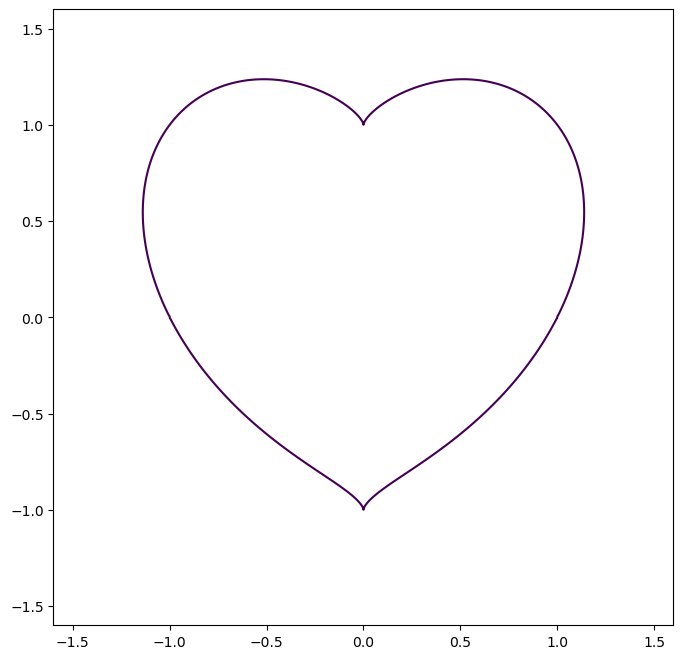

In [28]:
### Plot points X,Y,Z where func(X,0,Z) == 0 

y = 0

def funca (x,z):
    return (x**2 + 9/4* y**2 +z**2 -1)**3  - (x**2 * z**3) - (9 *(y**2*z**3))/200


#ax = plt.figure().add_subplot(projection='3d')
fig, ax = plt.subplots(1,1,figsize=(8,8))
cube_lim_min, cube_lim_max = -1.6,1.6

#ax.set_zlim(cube_lim_min, cube_lim_max)
ax.set_xlim(cube_lim_min, cube_lim_max)
ax.set_ylim(cube_lim_min, cube_lim_max)

X = np.arange(cube_lim_min, cube_lim_max, step)
Y = np.arange(cube_lim_min, cube_lim_max, step)

X, Y = np.meshgrid(X, Y)
XY=funca(X,Y)

import matplotlib
#matplotlib.pyplot.contour(X, Y, (XY1 - XY2), [0])
matplotlib.pyplot.contour(X, Y, XY, [0])

In [11]:
# Nice to do this cell alone because it takes a REALLY long time.
XYZ = func(X_3,Y_3,Z_3)

In [15]:
bool_coords = np.isclose(XYZ,0,atol=1e-8)

X_3_pts = X_3[bool_coords]
Y_3_pts = Y_3[bool_coords]
Z_3_pts = Z_3[bool_coords]

#res.max() 9.857647705660716e-09
#res = func(X_3_pts,Y_3_pts,Z_3_pts)

We have 1D arrays

In [17]:
X_3_pts.shape,Y_3_pts.shape,Z_3_pts.shape,

((626,), (626,), (626,))

Alt def of points using np.where, but this isnt usable by any of te matplotlib funcs we have
because it puts X,Y,Z as 3D arrays.

In [12]:
X_3_pts = np.where(np.isclose(XYZ,0),X_3,0)
Y_3_pts = np.where(np.isclose(XYZ,0),Y_3,0)
Z_3_pts = np.where(np.isclose(XYZ,0),Z_3,0)

It looks like the 3D triangle filling algorithm hasnt got enough info
to find the surface we want.

We cant sample more points because of memory limits.

We attempt to add triangles via matplotlib.tri.  Results weird with and without.

<Figure size 640x480 with 0 Axes>

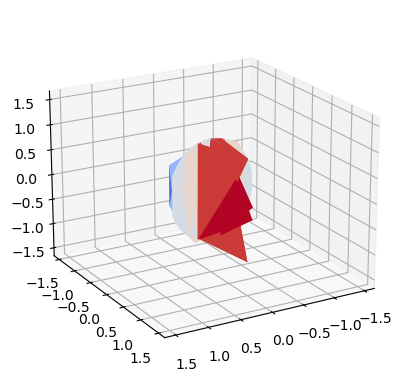

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.tri as mtri
import numpy as np
from sys import argv

# TRIANGLE STUFF Make a mesh in the space of parameterisation variables u and v
u = np.linspace(cube_lim_min, cube_lim_max, endpoint=True, num=50)
v = np.linspace(-0.5, 0.5, endpoint=True, num=10)
u, v = np.meshgrid(u, v)
u, v = u.flatten(), v.flatten()
# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(u, v)

fig = plt.figure()
ax = plt.figure().add_subplot(projection='3d')

ax.set_zlim(cube_lim_min, cube_lim_max)
ax.set_xlim(cube_lim_min, cube_lim_max)
ax.set_ylim(cube_lim_min, cube_lim_max)
# Change to rotate roll yaw view of figure.
# Change vertical_axis {"z","y","x"} and azim to "roll" Default is "z"
ax.view_init(elev=20, azim=60,vertical_axis="x")
surf= ax.plot_trisurf(X_3_pts, Y_3_pts, Z_3_pts,triangles=tri.triangles,  cmap=cm.coolwarm, linewidth=0.1) 
#surf= ax.plot_trisurf(X_3_pts, Y_3_pts, Z_3_pts, cmap=cm.coolwarm, linewidth=0.1) 
#print(ax.get_proj())
#fig.colorbar(surf, shrink=0.5, aspect=5)
#plt.savefig('teste.pdf')
#plt.show()

Trying a 3D scatterplot. Not much improvement.  Definite sense some needed points may be missing.

The horizontal halo is intrigueing.

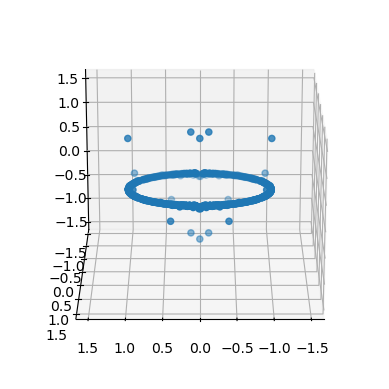

In [32]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d') 
ax.set_zlim(cube_lim_min, cube_lim_max)
ax.set_xlim(cube_lim_min, cube_lim_max)
ax.set_ylim(cube_lim_min, cube_lim_max)
ax.view_init(elev=20, azim=90)
ax.scatter(X_3_pts, Y_3_pts, Z_3_pts,  cmap=cm.coolwarm,)


In [35]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm

# Plot the surface.   This doesnt work becaUSE it wants 2D meshgrid args for Z,Y,Z
# This helps guarantee the surface is determined.
# ValueError: Argument Z must be 2-dimensional.
#surf = ax.plot_surface(X_3_pts, Y_3_pts, Z_3_pts, cmap=cm.coolwarm,
#                      linewidth=0, antialiased=False)




There is a 3D version of `contour`:

>The `contour3D()` function creates three-dimensional contour plot. It requires all the input data to be in the form of two-dimensional regular grids, with the Z-data evaluated at each point. Here, we will show a three-dimensional contour diagram of a three-dimensional sinusoidal function.

So we would have to create a function of 2 arguments that we can apply to 2D xy meshgrids (and then ask
for the contour when z is 0). 

Let's illustrate this.

Below we show `contour3D` in action. 

Note that `Z` needs to be a function of `X` and `Y`, so that when `X` and `Y` are 2D meshgrid matrices,
Z is the same.

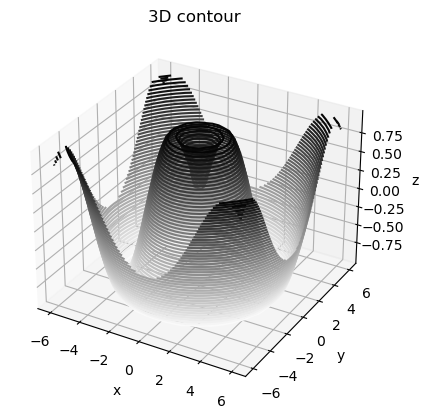

In [38]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
def f(x, y):
   return np.sin(np.sqrt(x ** 2 + y ** 2))
	
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
#  Draw the contour surface where the value of Z is 50
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D contour')
plt.show()

The problem in adapting this is (a)  it uses 2D meshgrids.  The meshgrids defined above are 3D.

```python
>>> X.shape
(640, 640, 640)
```

```python
>>> (XYZ1-XYZ2).shape
(640, 640, 640)
```

And (b).  To use a 2D meshgrid for x and y, it **seems** we need to solve for z when

$$
(x^2 + 9/4 y^2 + z^2 -1)^3  = x^2 * z^3 + 9/200 y^2 z^3
$$

There is no easy way to solve for `z` here, to abstract
a function of 2 arguments that we can apply to xy meshgrids (and then ask
for the contour when z is 0).  

What we can easily do is make a
function of 3 arguments and ask for its contour when it's 0,
but `contour3D` doesn't do that.

In [30]:
Z.shape

(40, 40)

In [31]:
X.shape,Y.shape

((40, 40), (40, 40))

Note the function `fsolve` fro `scipy.optimize` is for solving systems of equations,
requires as many equations as there are variables.

For example:

In [39]:
import numpy as np
from scipy.optimize import fsolve
def func(x):
    return [x[0] * np.cos(x[1]) - 4,
            x[1] * x[0] - x[1] - 5]
root = fsolve(func, [1, 1])
root

array([6.50409711, 0.90841421])

In [40]:
np.isclose(func(root), [0.0, 0.0])

array([ True,  True])

Simpler example

In [42]:
def func20(x):
    return [x[0]**2 * x[1]**2 - 25, x[0]-x[1]]

root = fsolve(func20, [5, 0])

In [43]:
root

array([2.23606798, 2.23606798])

In [44]:
(root**2).sum()

10.000000000000854

In [45]:
func(root)

[4.273914555597003e-12, 0.0]

In [48]:
# Too few equations
# TypeError: fsolve: there is a mismatch between the input and output shape of the 'func' argument 'func'.
#            Shape should be (2,) but it is (1,).


def func22(x):
    # Just 1 equation,  but 2 vars
    return [x[0]**2 * x[1]**2 - 25]

#root = fsolve(func22, [5, 0])

On the other hand `minimize` finds the uniue soln that minimizes an objective function,
subject to some constraints.

In [50]:
import numpy as np
from scipy.optimize import minimize
profit_0=50
profit_1=25

# initial guesses
n = 2
x0 = np.zeros(n)
x[0]=0
x[1]=0

def objective(x):
    return -1*(x[0]*profit_0 + x[1]*profit_1)

def constraint(x):
    return x[0] + x[1] - 100

#def constraint1(x):
#    return (x[0]+x[1]-100)

#def constraint2(x):
#    return (x[0]%=0)

#def constraint3(x):
 #   return (x[1]%=0)
#con1 = {'type': 'ineq', 'fun': constraint1} 
#con2 = {'type': 'eq', 'fun': constraint2} 
#con3 = {'type': 'eq', 'fun': constraint3} 
#cons = ([con1,con2,con3])

b = (0,100)
bnds = (b, b)

con = {'type': 'eq', 'fun': constraint}

cons = [con]
solution = minimize(objective,x0,method='SLSQP',bounds=bnds,constraints=cons)#constraints=cons
x=solution.x
print (solution)

     fun: -5000.0
     jac: array([-50., -25.])
 message: 'Optimization terminated successfully'
    nfev: 12
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([100.,   0.])


#### Solution?

It appears as if sympy might be th ebest solution for 3D paramatric plotting (implicit equatiobs).

https://docs.sympy.org/latest/modules/plotting.html#sympy.plotting.plot_implicit.plot_implicit